# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Daffa Suada
- Email: suadaadaffa@gmail.com
- Id Dicoding: daffa_suada_i9ug

## Persiapan

### Menyiapkan library yang dibutuhkan

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from joblib import dump, load

### Menyiapkan data yang akan diguankan

In [101]:
# Import data dengan separataor ";"
student_df = pd.read_csv("data.csv", sep=';')
student_df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [102]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [103]:
pd.set_option('display.max_columns', None)

student_df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Data Preparation / Preprocessing

### Data Cleansing

In [104]:
student_df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Sepertinya tidak terdapat data kosong pada data yang kita miliki. Kita dapat melanjutkan pada tahap selanjutnya.

### Mencari Outlier

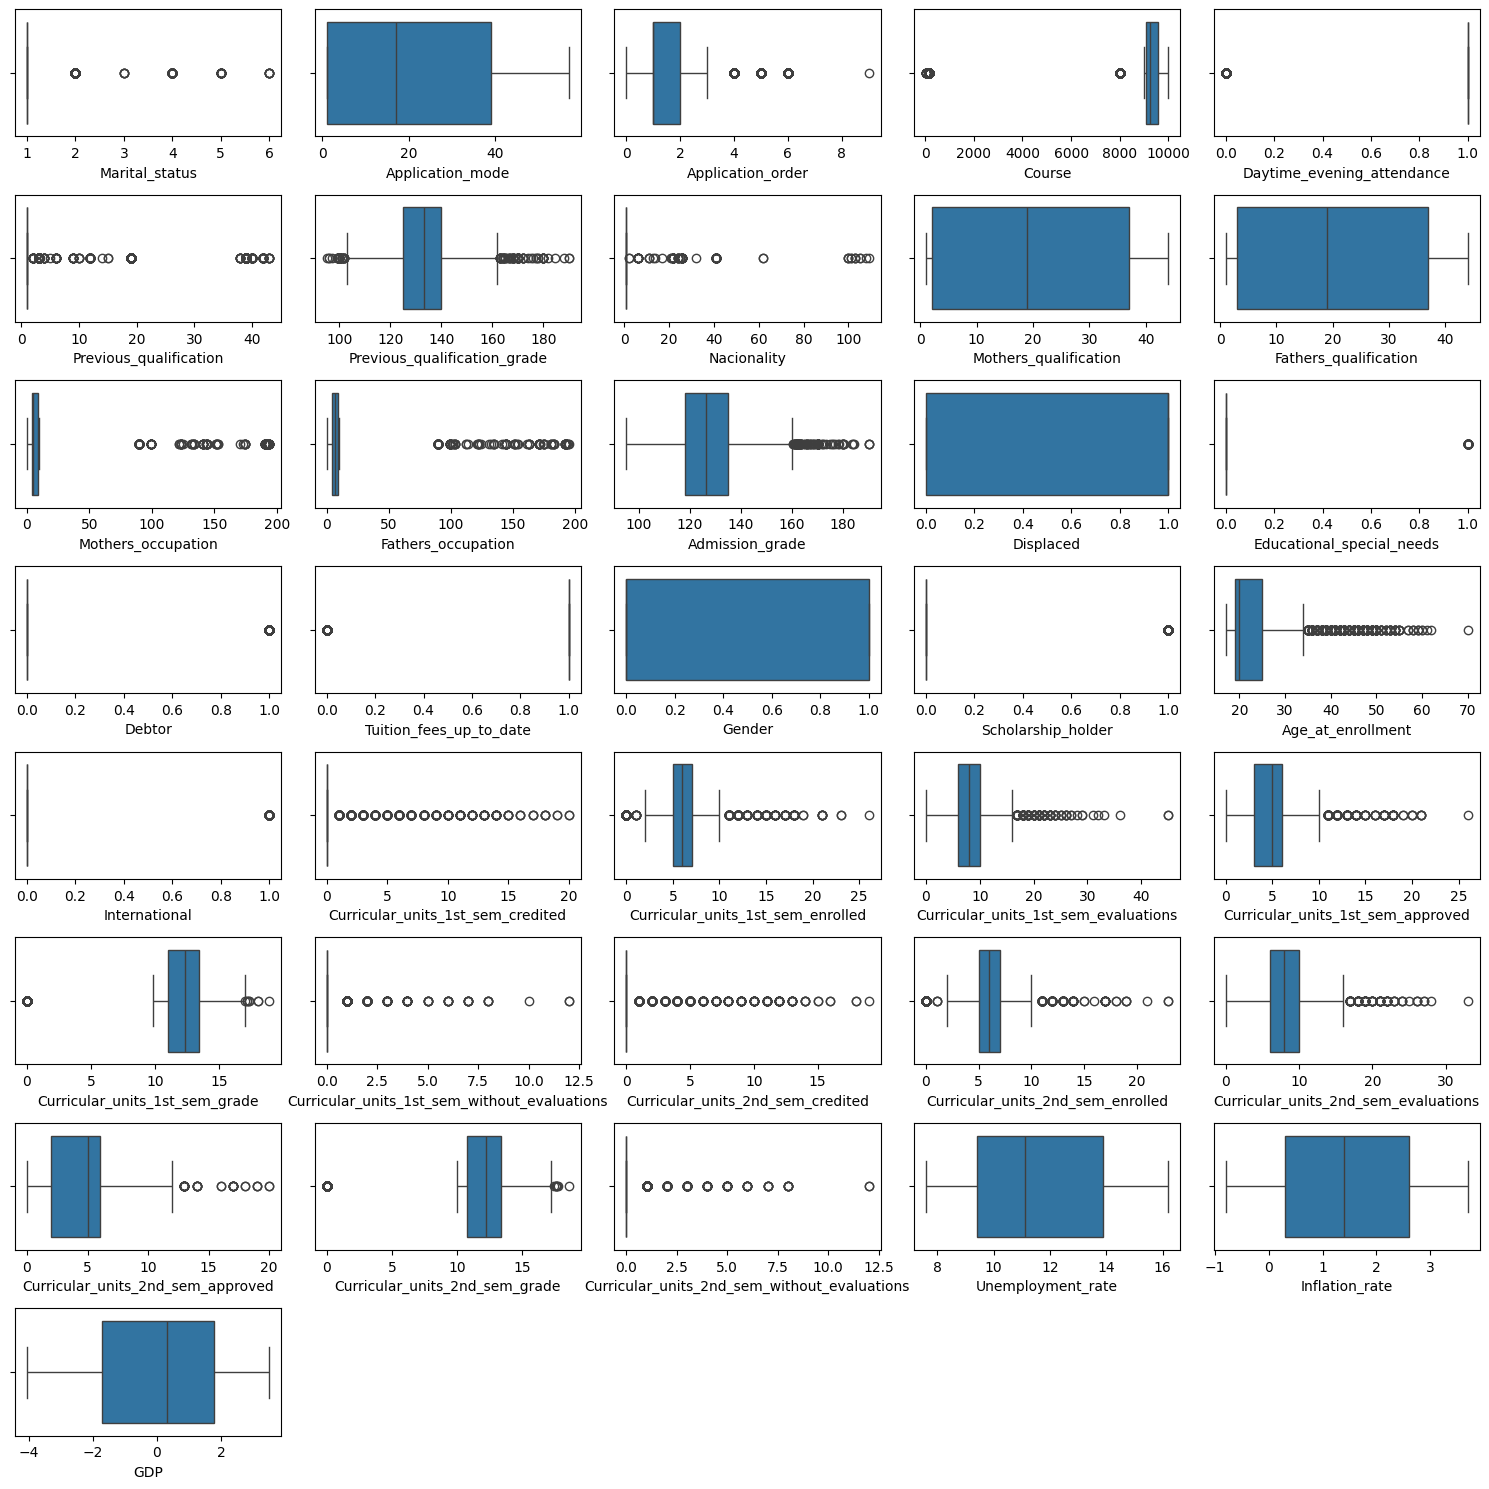

In [105]:
df_numeric = student_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 15))

num_rows = 8
num_cols = 5

for i, column in enumerate (df_numeric, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df_numeric, x=df_numeric[column])
    plt.tight_layout()

In [106]:
# helper function
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,7))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

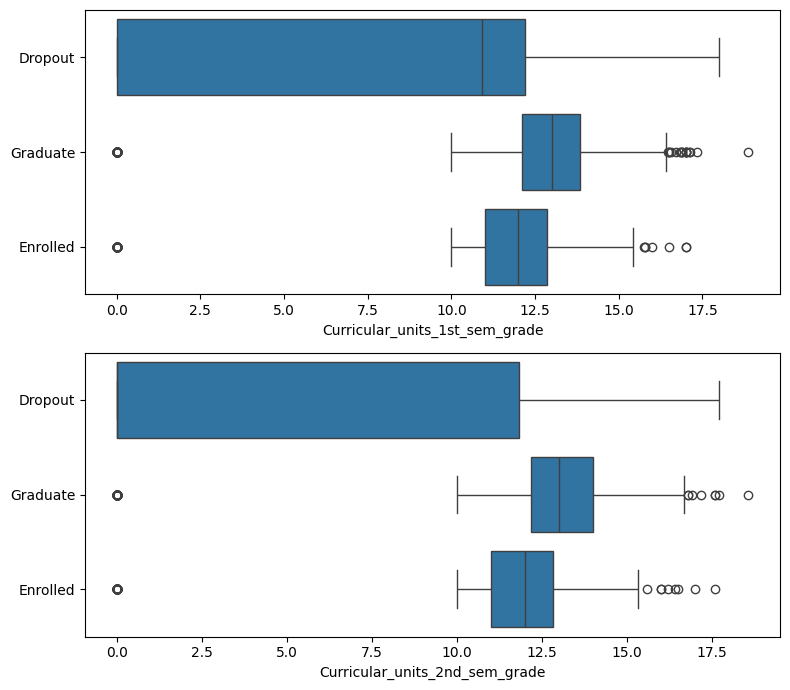

In [107]:
numerical_dis_plot(
    features=["Curricular_units_1st_sem_grade", "Curricular_units_2nd_sem_grade"],
    df=student_df,
    segment_feature="Status"
)

In [108]:
# Menghitung data untuk siswa graduate dengan grade 0 pada semester pertama
filtered_data = student_df[(student_df['Status'] == 'Graduate') & (student_df['Curricular_units_1st_sem_grade'] == 0)]

# print("Hasil filter:")
# print(filtered_data)
filtered_data.shape[0]

77

In [109]:
# Menghitung data untuk siswa graduate dengan grade yang lebih dari 0 pada semester pertama
filtered_data = student_df[(student_df['Status'] == 'Graduate') & (student_df['Curricular_units_1st_sem_grade'] > 0)]

# print("Hasil filter:")
# print(filtered_data)
filtered_data.shape[0]

2132

In [110]:
filtered_data.head(3)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [111]:
# Menghitung data untuk siswa graduate dengan grade 0 pada semester ke 2
filtered_data = student_df[(student_df['Status'] == 'Graduate') & (student_df['Curricular_units_2nd_sem_grade'] == 0)]

# print("Hasil filter:")
# print(filtered_data)
filtered_data.shape[0]

75

In [112]:
# Menghitung data untuk siswa graduate dengan grade 0 pada semester ke 2
filtered_data = student_df[(student_df['Status'] == 'Graduate') & (student_df['Curricular_units_2nd_sem_grade'] > 0)]

# print("Hasil filter:")
# print(filtered_data)
filtered_data.shape[0]

2134

Dari data di atas, kita dapat melihat siswa yang Graduate tapi mendapat nilai 0, hal ini mungkin terjadi karena kesalahan inputan data atau missing data.

Karena statusnya sudah kita ketahui, yaitu 'Graduate' maka kita dapat melakukan pengisian data dengan mengambil nilai rata rata pada siswa yang lulus.

In [113]:
student_df_imputed = student_df.copy()

# Imputasi semester 1
mean_grade_1st = student_df_imputed[
    (student_df_imputed['Status'] == 'Graduate') &
    (student_df_imputed['Curricular_units_1st_sem_grade'] > 0)
]['Curricular_units_1st_sem_grade'].mean()

mask_1st = (
    (student_df_imputed['Status'] == 'Graduate') &
    (student_df_imputed['Curricular_units_1st_sem_grade'] == 0)
)
student_df_imputed.loc[mask_1st, 'Curricular_units_1st_sem_grade'] = mean_grade_1st

# Imputasi semester 2
mean_grade_2nd = student_df_imputed[
    (student_df_imputed['Status'] == 'Graduate') &
    (student_df_imputed['Curricular_units_2nd_sem_grade'] > 0)
]['Curricular_units_2nd_sem_grade'].mean()

mask_2nd = (
    (student_df_imputed['Status'] == 'Graduate') &
    (student_df_imputed['Curricular_units_2nd_sem_grade'] == 0)
)
student_df_imputed.loc[mask_2nd, 'Curricular_units_2nd_sem_grade'] = mean_grade_2nd

print("Nilai rata-rata 1st sem grade (Graduate):", mean_grade_1st)
print("Nilai rata-rata 2nd sem grade (Graduate):", mean_grade_2nd)

Nilai rata-rata 1st sem grade (Graduate): 13.100296840948086
Nilai rata-rata 2nd sem grade (Graduate): 13.143524991110894


In [114]:
student_df_imputed.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [115]:
clean_student_df = student_df_imputed.copy()

# Simpan dataset
clean_student_df.to_csv("clean_student_df.csv", index=False)

status_marital = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}

status_course = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

status_gender = {
    1: 'male',
    0: 'female',
}


status_scholarship = {
    1: 'yes',
    0: 'no',
}

status_attendance = {
    1: 'daytime',
    0: 'evening',
}

father_qualification = {
    1: 'Secondary Education - 12th Year or Eq.',
    2: "Bachelor's Degree",
    3: 'Higher Education - Degree',
    4: "Master's Degree",
    5: 'Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year - Not Completed',
    10: '11th Year - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year',
    13: '2nd Year Complementary High School',
    14: '10th Year',
    18: 'General Commerce Course',
    19: 'Basic Education 3rd Cycle (9th–11th Year)',
    20: 'Complementary High School Course',
    22: 'Technical-Professional Course',
    25: 'Complementary High School - Not Concluded',
    26: '7th Year',
    27: '2nd Cycle General High School',
    29: '9th Year - Not Completed',
    30: '8th Year',
    31: 'General Course of Admin and Commerce',
    33: 'Supplementary Accounting and Admin',
    34: 'Unknown',
    35: "Can't Read or Write",
    36: 'Can Read, No 4th Year Schooling',
    37: 'Basic Education 1st Cycle (4th–5th Year)',
    38: 'Basic Education 2nd Cycle (6th–8th Year)',
    39: 'Technological Specialization Course',
    40: 'Higher Education - Degree (1st Cycle)',
    41: 'Specialized Higher Studies Course',
    42: 'Professional Higher Technical Course',
    43: "Master's (2nd Cycle)",
    44: "Doctorate (3rd Cycle)"
}

father_occupation = {
    0: 'Student',
    1: 'Legislative/Executive Directors and Managers',
    2: 'Intellectual and Scientific Specialists',
    3: 'Intermediate Level Technicians',
    4: 'Administrative Staff',
    5: 'Services, Security, Sellers',
    6: 'Farmers and Agricultural Workers',
    7: 'Skilled Industry and Construction Workers',
    8: 'Machine Operators and Assemblers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: 'Blank',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces Personnel',
    112: 'Administrative and Commercial Directors',
    114: 'Hotel, Catering, and Services Directors',
    121: 'Physical Sciences and Engineering Specialists',
    122: 'Health Professionals',
    123: 'Teachers',
    124: 'Finance and Administration Specialists',
    131: 'Science and Engineering Technicians',
    132: 'Health Technicians',
    134: 'Legal, Social, and Cultural Technicians',
    135: 'ICT Technicians',
    141: 'Secretaries and Data Operators',
    143: 'Accounting and Financial Operators',
    144: 'Other Admin Support Staff',
    151: 'Personal Service Workers',
    152: 'Sellers',
    153: 'Personal Care Workers',
    154: 'Protection and Security Staff',
    161: 'Market-Oriented Farmers',
    163: 'Subsistence Farmers and Fishers',
    171: 'Construction Workers (non-electric)',
    172: 'Metalworkers',
    174: 'Electrical and Electronics Workers',
    175: 'Food, Wood, Textile, Other Industry Workers',
    181: 'Fixed Plant and Machine Operators',
    182: 'Assembly Workers',
    183: 'Drivers and Equipment Operators',
    192: 'Unskilled Agricultural Workers',
    193: 'Unskilled Industry and Construction Workers',
    194: 'Meal Prep Assistants',
    195: 'Street Vendors and Service Providers'
}



# Terapkan label ke dataframe
clean_student_df['Marital_status'] = clean_student_df['Marital_status'].map(status_marital)
clean_student_df['Course'] = clean_student_df['Course'].map(status_course)
clean_student_df['Gender'] = clean_student_df['Gender'].map(status_gender)
clean_student_df['Scholarship_holder'] = clean_student_df['Scholarship_holder'].map(status_scholarship)
clean_student_df['Daytime_evening_attendance'] = clean_student_df['Daytime_evening_attendance'].map(status_attendance)
clean_student_df['Fathers_qualification'] = clean_student_df['Fathers_qualification'].map(father_qualification)
clean_student_df['Fathers_occupation'] = clean_student_df['Fathers_occupation'].map(father_occupation)

Kode di atas berfungsi untuk mengubah kode numerik menjadi nilai kategorikal berdasarkan informasi yang telah kita dapat di penjelasan dataset tersebut

In [116]:
clean_student_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,17,5,Animation and Multimedia Design,daytime,1,122.0,1,19,Other - 11th Year,5,Unskilled Workers,127.3,1,0,0,1,male,no,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,15,1,Tourism,daytime,1,160.0,1,1,Higher Education - Degree,3,Intermediate Level Technicians,142.5,1,0,0,0,male,no,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1,5,Communication Design,daytime,1,122.0,1,37,Basic Education 1st Cycle (4th–5th Year),9,Unskilled Workers,124.8,1,0,0,0,male,no,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,17,2,Journalism and Communication,daytime,1,122.0,1,38,Basic Education 1st Cycle (4th–5th Year),5,Intermediate Level Technicians,119.6,1,0,0,1,female,no,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,39,1,Social Service (evening attendance),evening,1,100.0,1,37,Basic Education 2nd Cycle (6th–8th Year),9,Unskilled Workers,141.5,0,0,0,1,female,no,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [117]:
# Simpan dataset
clean_student_df.to_csv("clean_student_df.csv", index=False)

## Data Visualisation

          Gender
Status          
Dropout     1421
Enrolled     794
Graduate    2209


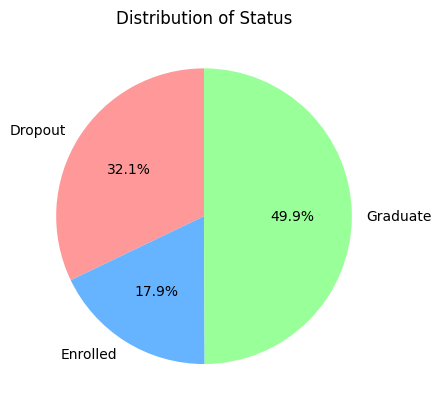

In [118]:
# Student Distribution
student_status = clean_student_df.groupby('Status').agg({"Gender" : "count"})
print(student_status)

labels = student_status.index.tolist()
sizes = student_status['Gender'].values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Buat pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Status')
plt.show()

Dari data di atas terlihat siswa yang graduate lebih banyak dari pada dua keterangan lainnya sebesar 2209, namun siswa yang dropout jumlahnya lebih dari setengah siswa yang lulus, yaitu sebanyak 1421 orang.

        Gender
Gender        
female    2868
male      1556


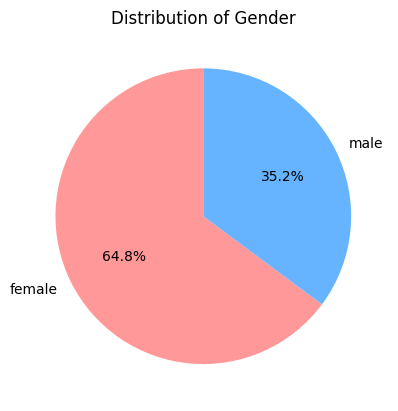

In [119]:
# Student Gender
student_status = clean_student_df.groupby('Gender').agg({"Gender" : "count"})
print(student_status)

labels = student_status.index.tolist()
sizes = student_status['Gender'].values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Buat pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Gender')
plt.show()

Kita telah mengetahui keseluruhan gender yang ada pada dataset tersebut selanjutnya mencari berapa persen siswa yang melakukan dropout berdasarkan gender.

        Gender
Gender        
female     720
male       701


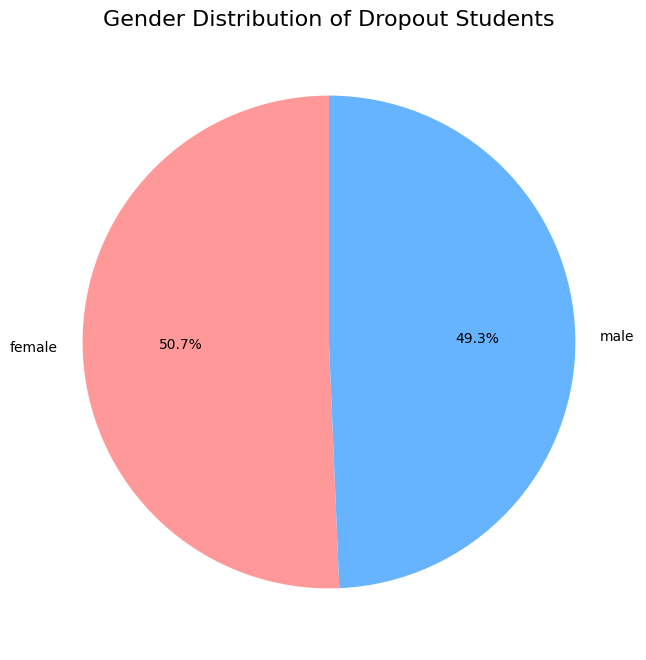

In [120]:
# Filter gender siswa yang Dropout
student_marital_dropout = clean_student_df[clean_student_df["Status"] == "Dropout"]

student_status = student_marital_dropout.groupby('Gender').agg({"Gender" : "count"})
print(student_status)

labels = student_status.index.tolist()
sizes = student_status['Gender'].values
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution of Dropout Students', fontsize=16)
plt.show()

Dari data di atas terlihat perempuan lebih banyak dropout di banding laki laki, namun yang mencolok terkait siswa yang dropout antara laki-laki dan perempuan, karena perbandingannya sangat kecil antara 50.7% untuk perempuan dan 49.3% untuk laki laki.

                            Gender
Age_at_enrollment Status          
17                Enrolled       2
                  Graduate       3
18                Dropout      202
                  Enrolled     172
                  Graduate     662
...                            ...
59                Graduate       1
60                Graduate       2
61                Dropout        1
62                Graduate       1
70                Dropout        1

[121 rows x 1 columns]


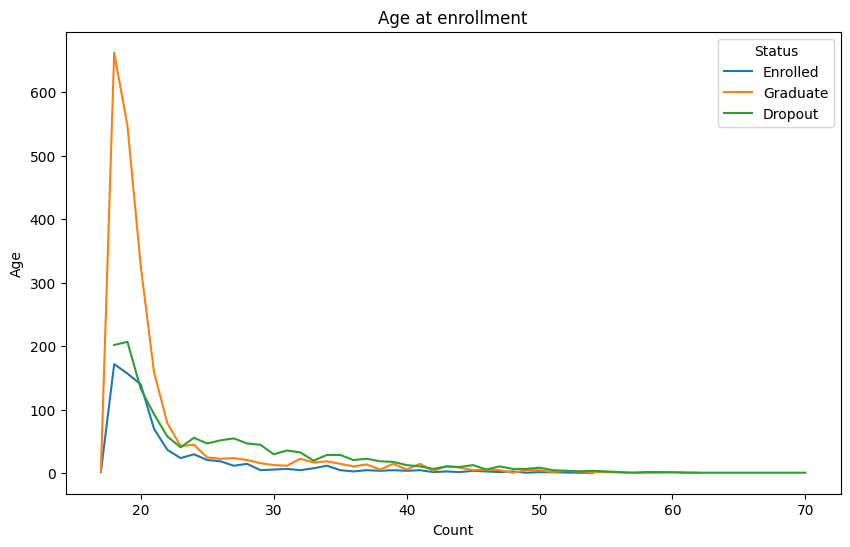

In [121]:
# Student Age at enrollment
studeng_age = clean_student_df.groupby(['Age_at_enrollment', 'Status']).agg({"Gender" : "count"})
print(studeng_age)

plt.figure(figsize=(10,6))
sns.lineplot(data=studeng_age, x='Age_at_enrollment', y='Gender', hue='Status')
plt.title('Age at enrollment')
plt.ylabel('Age')
plt.xlabel('Count')
plt.show()

Dari data di atas terlihat bahwa siswa yang berumur mulai dari 18 - 20 tahun cenderung untuk lulus.

      Marital_status  Gender
0             single    3919
1            married     379
2           divorced      91
3        facto union      25
4  legally separated       6
5            widower       4


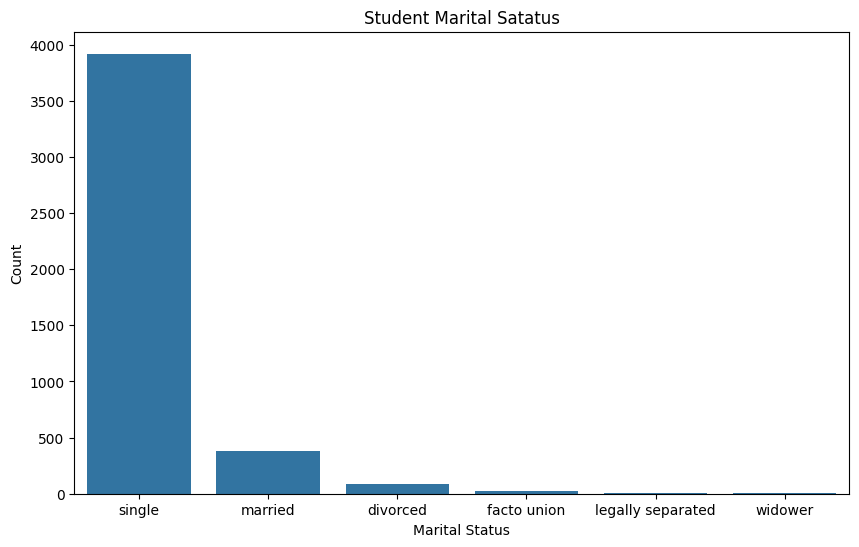

In [122]:
# Student Marita Satatus
student_marital_group = clean_student_df.groupby(["Marital_status"]).agg({"Gender" : "count"}).sort_values(by='Gender', ascending=False).reset_index()
print(student_marital_group)

plt.figure(figsize=(10,6))
sns.barplot(data=student_marital_group, x='Marital_status', y='Gender', )
plt.title('Student Marital Satatus')
plt.ylabel('Count')
plt.xlabel('Marital Status')
plt.show()

     Status Scholarship_holder  Gender
0  Graduate                 no    1374
1   Dropout                 no    1287
2  Graduate                yes     835
3  Enrolled                 no     664
4   Dropout                yes     134
5  Enrolled                yes     130


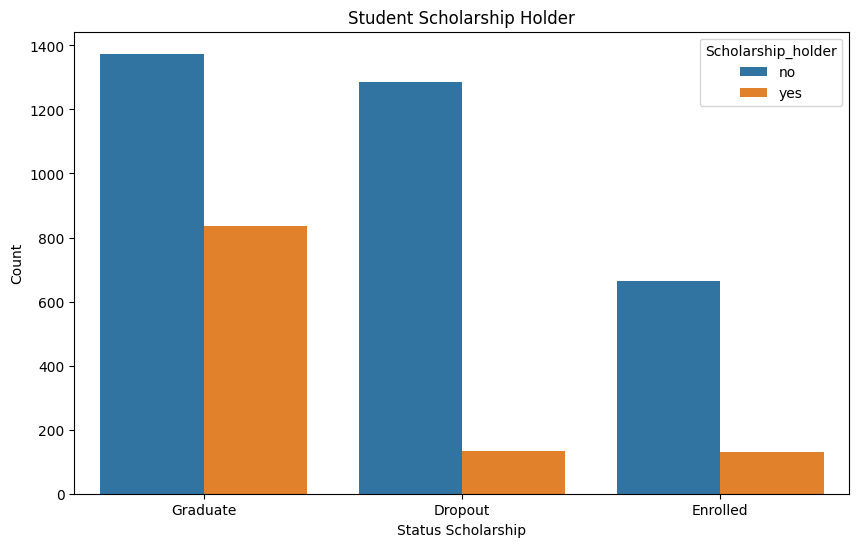

In [123]:
# Student Scholarship Holder
student_scholarship_group = clean_student_df.groupby(["Status", "Scholarship_holder"]).agg({"Gender" : "count"}).sort_values(by='Gender', ascending=False).reset_index()
print(student_scholarship_group)

plt.figure(figsize=(10,6))
sns.barplot(data=student_scholarship_group, x='Status', y='Gender', hue = 'Scholarship_holder')
plt.title('Student Scholarship Holder')
plt.ylabel('Count')
plt.xlabel('Status Scholarship')
plt.show()

Disini kita akan mengetahui bahwa siswa yang mendapatkan beasiswa lebih banyak graduate dari pada siswa yang dropout. Namun siswa yang tidak mendapatkan beasiswa mendapatkan hasil yang hampir mirip antara graduate dan dropout.

     Status  Curricular_units_1st_sem_grade  Curricular_units_2nd_sem_grade
0   Dropout                        7.256656                        5.899339
1  Enrolled                       11.125257                       11.117364
2  Graduate                       13.100297                       13.143525


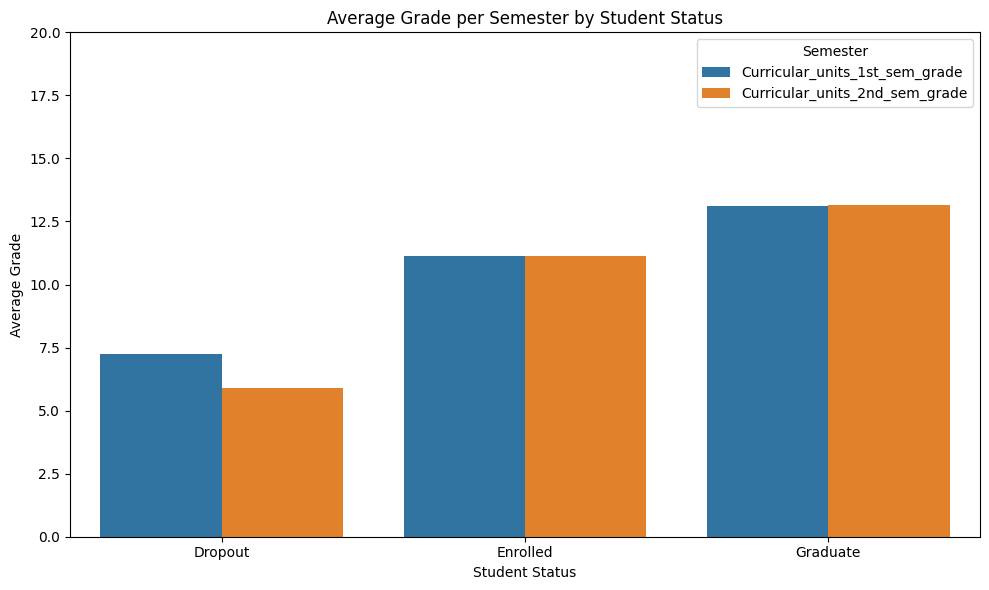

In [124]:
# Average grade semester 1 and 2
student_average_grade_group = clean_student_df.groupby("Status")[["Curricular_units_1st_sem_grade", "Curricular_units_2nd_sem_grade"]].mean().reset_index()
print(student_average_grade_group)

student_scholarship_melt = pd.melt(student_average_grade_group, id_vars="Status",
                                    var_name="Semester", value_name="Average Grade")

plt.figure(figsize=(10, 6))
sns.barplot(data=student_scholarship_melt, x="Status", y="Average Grade", hue="Semester")
plt.title("Average Grade per Semester by Student Status")
plt.ylabel("Average Grade")
plt.xlabel("Student Status")
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

Nilai rata rata siswa yang graduate lebih tinggi di bandingkan siswa yang dropout pada 2 semester yang di ketahui.

     Status Daytime_evening_attendance  Gender
0   Dropout                    evening     207
1  Enrolled                    evening      75
2  Graduate                    evening     201
3   Dropout                    daytime    1214
4  Enrolled                    daytime     719
5  Graduate                    daytime    2008


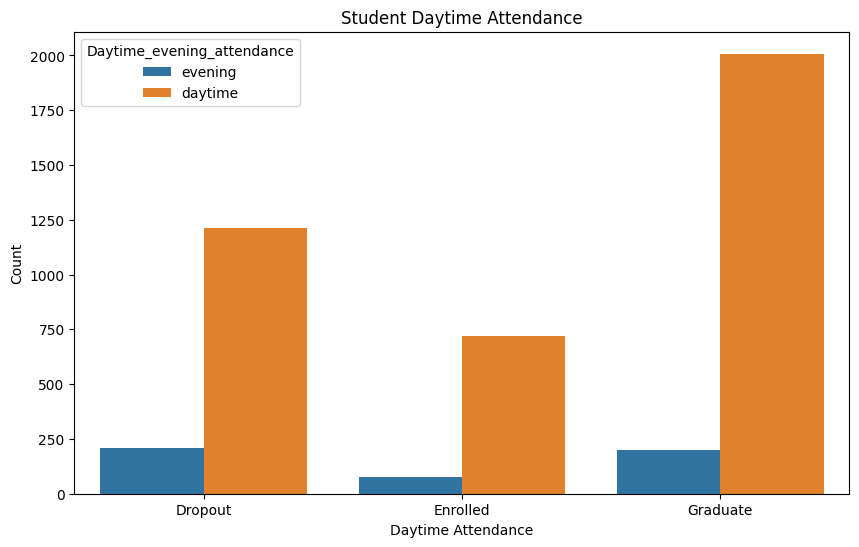

In [125]:
# Student Daytime Attendance
student_daytime_group = clean_student_df.groupby(["Status", "Daytime_evening_attendance"]).agg({"Gender" : "count"}).sort_values(by='Daytime_evening_attendance', ascending=False).reset_index()
print(student_daytime_group)

plt.figure(figsize=(10,6))
sns.barplot(data=student_daytime_group, x='Status', y='Gender', hue = 'Daytime_evening_attendance')
plt.title('Student Daytime Attendance')
plt.ylabel('Count')
plt.xlabel('Daytime Attendance')
plt.show()

Siswa yang mengambil kelas sore lebih cendering dropout dari pada graduate.

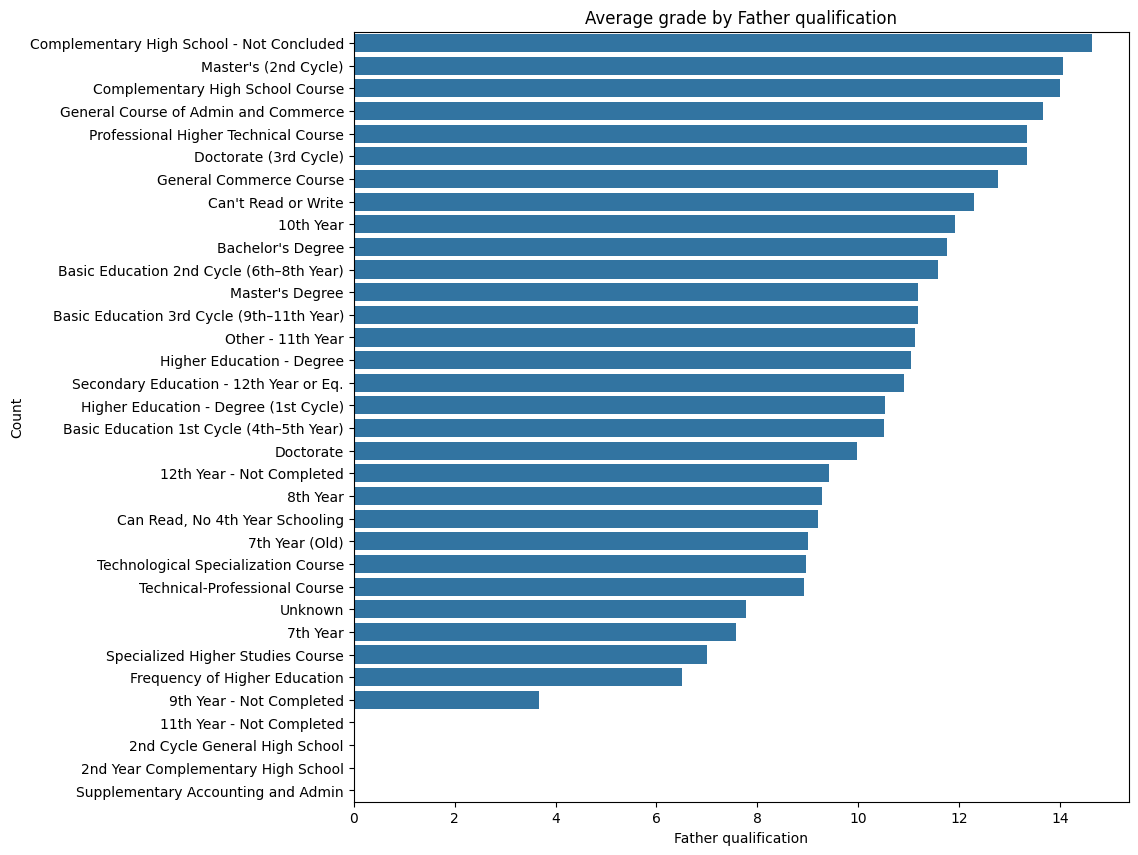

In [126]:
# Average grade by Father qualification
student_father_qualification_group = clean_student_df.groupby(["Fathers_qualification"]).agg({"Curricular_units_1st_sem_grade" : "mean"}).sort_values(by='Curricular_units_1st_sem_grade', ascending=False).reset_index()
# print(student_father_qualification_group)

plt.figure(figsize=(10,10))
sns.barplot(data=student_father_qualification_group, y='Fathers_qualification', x='Curricular_units_1st_sem_grade')
plt.title('Average grade by Father qualification')
plt.ylabel('Count')
plt.xlabel('Father qualification')
plt.show()

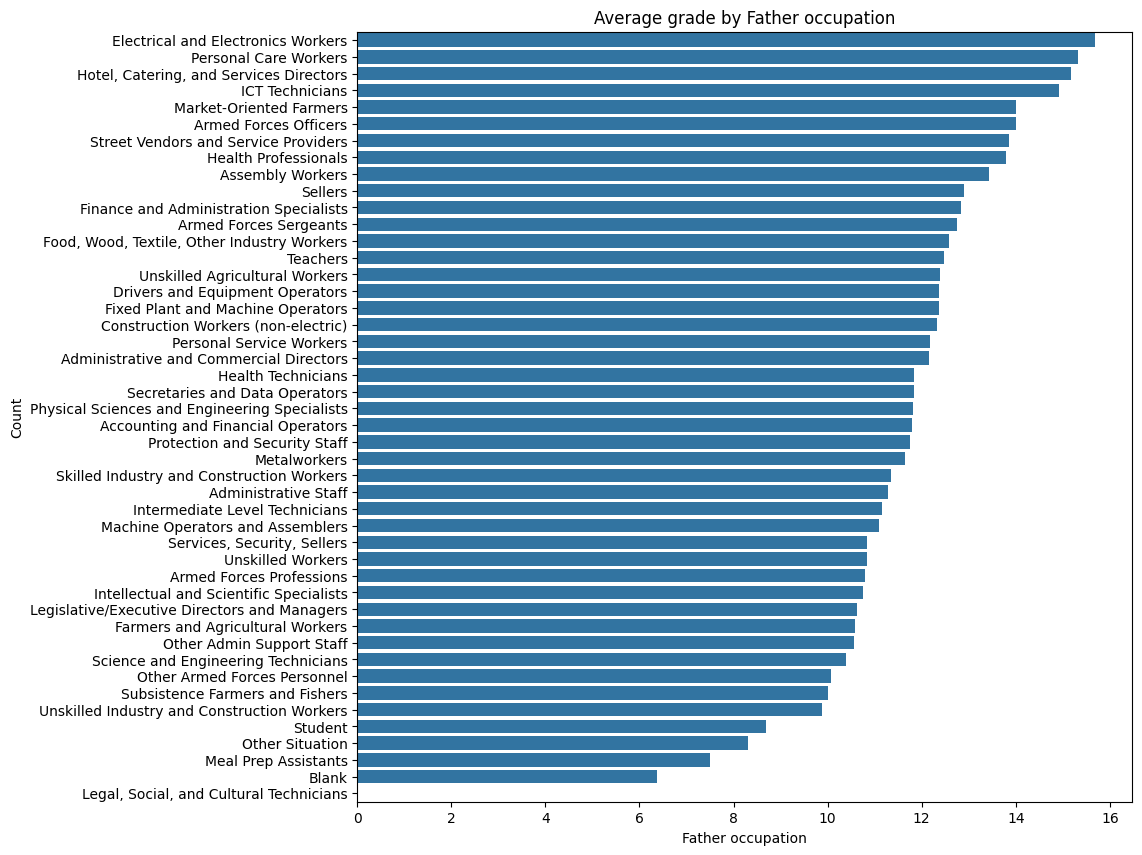

In [127]:
# Average grade by Father occupation
student_father_occupation_group = clean_student_df.groupby(["Fathers_occupation"]).agg({"Curricular_units_1st_sem_grade" : "mean"}).sort_values(by='Curricular_units_1st_sem_grade', ascending=False).reset_index()
# print(student_father_occupation_group.head(5))

plt.figure(figsize=(10,10))
sns.barplot(data=student_father_occupation_group, y='Fathers_occupation', x='Curricular_units_1st_sem_grade')
plt.title('Average grade by Father occupation')
plt.ylabel('Count')
plt.xlabel('Father occupation')
plt.show()

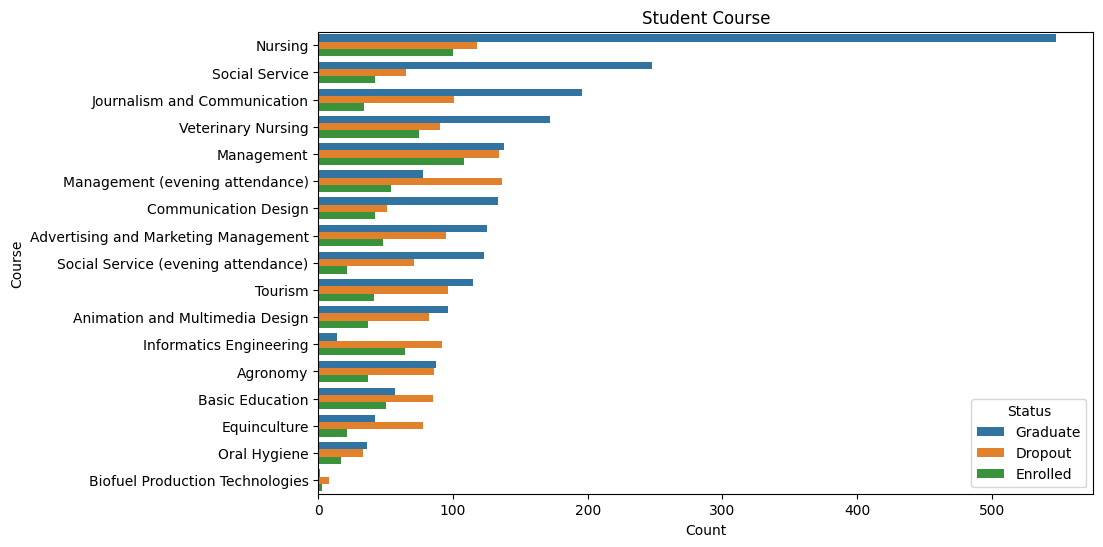

In [128]:
# Student Course
student_course_group = clean_student_df.groupby(["Course", "Status"]).agg({"Gender" : "count"}).sort_values(by='Gender', ascending=False).reset_index()
# print(student_course_group.head(10))

plt.figure(figsize=(10,6))
sns.barplot(data=student_course_group, x='Gender', y='Course', hue = 'Status')
plt.title('Student Course')
plt.ylabel('Course')
plt.xlabel('Count')
plt.show()

Jumlah siswa yang keluar ternyata lebih banyak pada studi Management yang di akumulasi berdasarkan kelas reguler dan evening. Lalu siswa yang graduate terbanyak ada di studi `nursing`, `social service`, dan `journalism dan comunication`

     Age_at_enrollment    Status  Gender
0                   17  Enrolled       2
1                   17  Graduate       3
2                   18   Dropout     202
3                   18  Enrolled     172
4                   18  Graduate     662
..                 ...       ...     ...
116                 59  Graduate       1
117                 60  Graduate       2
118                 61   Dropout       1
119                 62  Graduate       1
120                 70   Dropout       1

[121 rows x 3 columns]


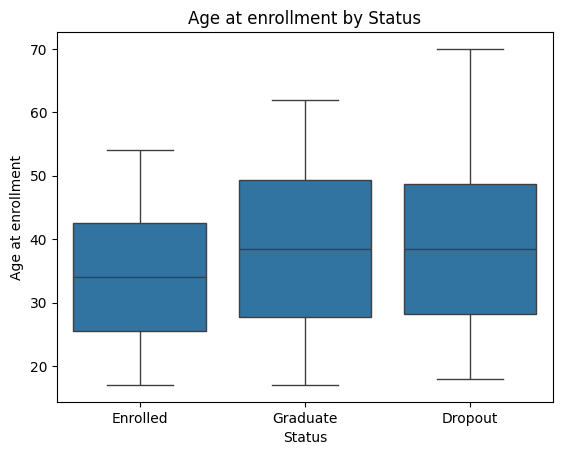

In [129]:
# Age at enrollment by Status
employee_departmen = student_df.groupby(["Age_at_enrollment", "Status"]).agg({"Gender" : "count"}).reset_index()
print(employee_departmen)

sns.boxplot(data=employee_departmen,
            x='Status',
            y='Age_at_enrollment'
            )

plt.title('Age at enrollment by Status')
plt.xlabel('Status')
plt.ylabel('Age at enrollment')
plt.show()

## Encoding

Mengubah data objek menjadi data numerik

In [130]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

df_cat = student_df_imputed.select_dtypes(include="object")
cat_col = df_cat.columns

# Encode kolom kategorikal
for column in cat_col:
    clean_student_df[column] = label_encoder.fit_transform(student_df[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
clean_student_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,17,5,Animation and Multimedia Design,daytime,1,122.0,1,19,Other - 11th Year,5,Unskilled Workers,127.3,1,0,0,1,male,no,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,single,15,1,Tourism,daytime,1,160.0,1,1,Higher Education - Degree,3,Intermediate Level Technicians,142.5,1,0,0,0,male,no,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,single,1,5,Communication Design,daytime,1,122.0,1,37,Basic Education 1st Cycle (4th–5th Year),9,Unskilled Workers,124.8,1,0,0,0,male,no,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,single,17,2,Journalism and Communication,daytime,1,122.0,1,38,Basic Education 1st Cycle (4th–5th Year),5,Intermediate Level Technicians,119.6,1,0,0,1,female,no,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,married,39,1,Social Service (evening attendance),evening,1,100.0,1,37,Basic Education 2nd Cycle (6th–8th Year),9,Unskilled Workers,141.5,0,0,0,1,female,no,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


## Spliting Data

Menggunkan teknik undersampling untuk menyamakan data yang di dominasi oleh `Graduate`.

In [131]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(student_df, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(4202, 37)
(222, 37)


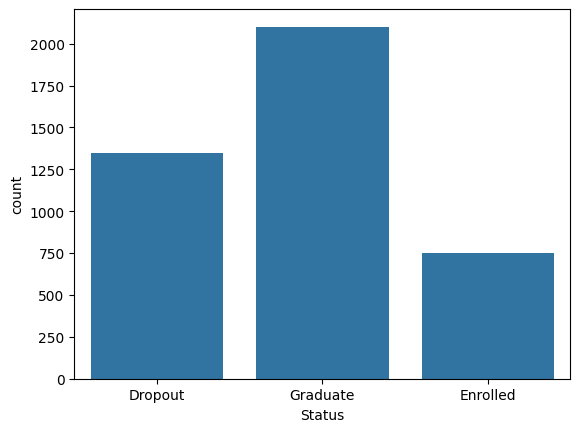

In [132]:
sns.countplot(data=train_df, x="Status")
plt.show()

In [133]:
train_df.Status.value_counts()

,count
Status,
Graduate,2101
Dropout,1349
Enrolled,752


In [134]:
df_majority_1 = train_df[(train_df.Status	 == "Graduate")]
df_majority_2 = train_df[(train_df.Status	 == "Dropout")]
df_minority = train_df[(train_df.Status	 == "Enrolled")]

In [135]:
from sklearn.utils import resample

df_majority_1_undersampled = resample(df_majority_1, n_samples=752, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=752, random_state=42)
print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(752, 37)
(752, 37)


In [136]:
from sklearn.utils import shuffle

undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
1024,2,42,1,9991,0,1,130.0,1,3,2,2,2,130.0,0,0,0,1,1,0,27,0,2,2,2,2,12.500000,0,0,5,6,2,12.500000,0,12.7,3.7,-1.70,Enrolled
1747,1,1,1,9556,1,1,135.0,1,37,38,7,9,125.8,0,0,0,1,0,1,20,0,0,7,14,7,10.642857,0,0,8,8,8,11.550000,0,12.7,3.7,-1.70,Graduate
432,1,1,1,9254,1,1,127.0,1,19,19,4,6,120.7,0,0,1,0,0,0,22,0,0,6,10,5,11.000000,0,0,6,12,0,0.000000,0,10.8,1.4,1.74,Dropout
948,1,1,5,9147,1,1,134.0,1,3,2,2,2,134.7,0,0,0,1,1,0,22,0,1,5,10,4,11.750000,0,0,5,10,3,11.000000,0,7.6,2.6,0.32,Enrolled
1284,1,17,2,9254,1,1,131.0,1,1,19,9,9,130.3,1,0,0,1,0,1,18,0,0,6,6,6,12.833333,0,0,6,7,6,12.333333,0,13.9,-0.3,0.79,Graduate


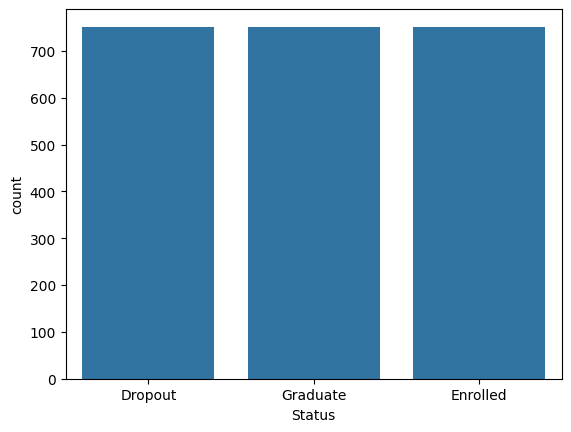

In [137]:
sns.countplot(data=undersampled_train_df, x="Status")
plt.show()

In [138]:
# Memisahkan fitur (X) dan target (y)
X = undersampled_train_df.drop(columns=['Status'])
y = undersampled_train_df['Status']

Membagi data dengan ketentuan 80 : 20 untuk data train dan test.

In [139]:
from sklearn.model_selection import train_test_split

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1804, 36), y_train=(1804,)
Test set shape: X_test=(452, 36), y_test=(452,)


## Modeling

Menggunakan beberapa model diantaranya: LogisticRegression, DecissionTreeClassifier, RandomForestClassifier, dan Support Vector Classification.

In [140]:
# Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
lr = LogisticRegression().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC(class_weight='balanced').fit(X_train, y_train)

print("Model training selesai.")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model training selesai.


## Evaluation

In [141]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Check the shape of the confusion matrix
    if cm.shape == (2, 2):  # If it's a binary classification problem
        tn, fp, fn, tp = cm.ravel()
    else:  # For multi-class classification
        # Handle multi-class metrics differently or print a message
        print("Multi-class classification detected. TN, FP, FN, TP not directly applicable.")
        tn, fp, fn, tp = None, None, None, None  # or other appropriate handling

    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),  # Use average='weighted' for multi-class
        'F1-Score': f1_score(y_test, y_pred, average='weighted')  # Use average='weighted' for multi-class
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Logistic Regresion': evaluate_model(lr, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

Multi-class classification detected. TN, FP, FN, TP not directly applicable.
Multi-class classification detected. TN, FP, FN, TP not directly applicable.
Multi-class classification detected. TN, FP, FN, TP not directly applicable.
Multi-class classification detected. TN, FP, FN, TP not directly applicable.
                          Model  Accuracy  Precision    Recall  F1-Score
0            Logistic Regresion  0.606195   0.609696  0.606195  0.599094
1            Decision Tree (DT)  0.690265   0.686570  0.690265  0.686674
2            Random Forest (RF)  0.763274   0.764075  0.763274  0.762595
3  Support Vector Machine (SVM)  0.305310   0.178413  0.305310  0.173680


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


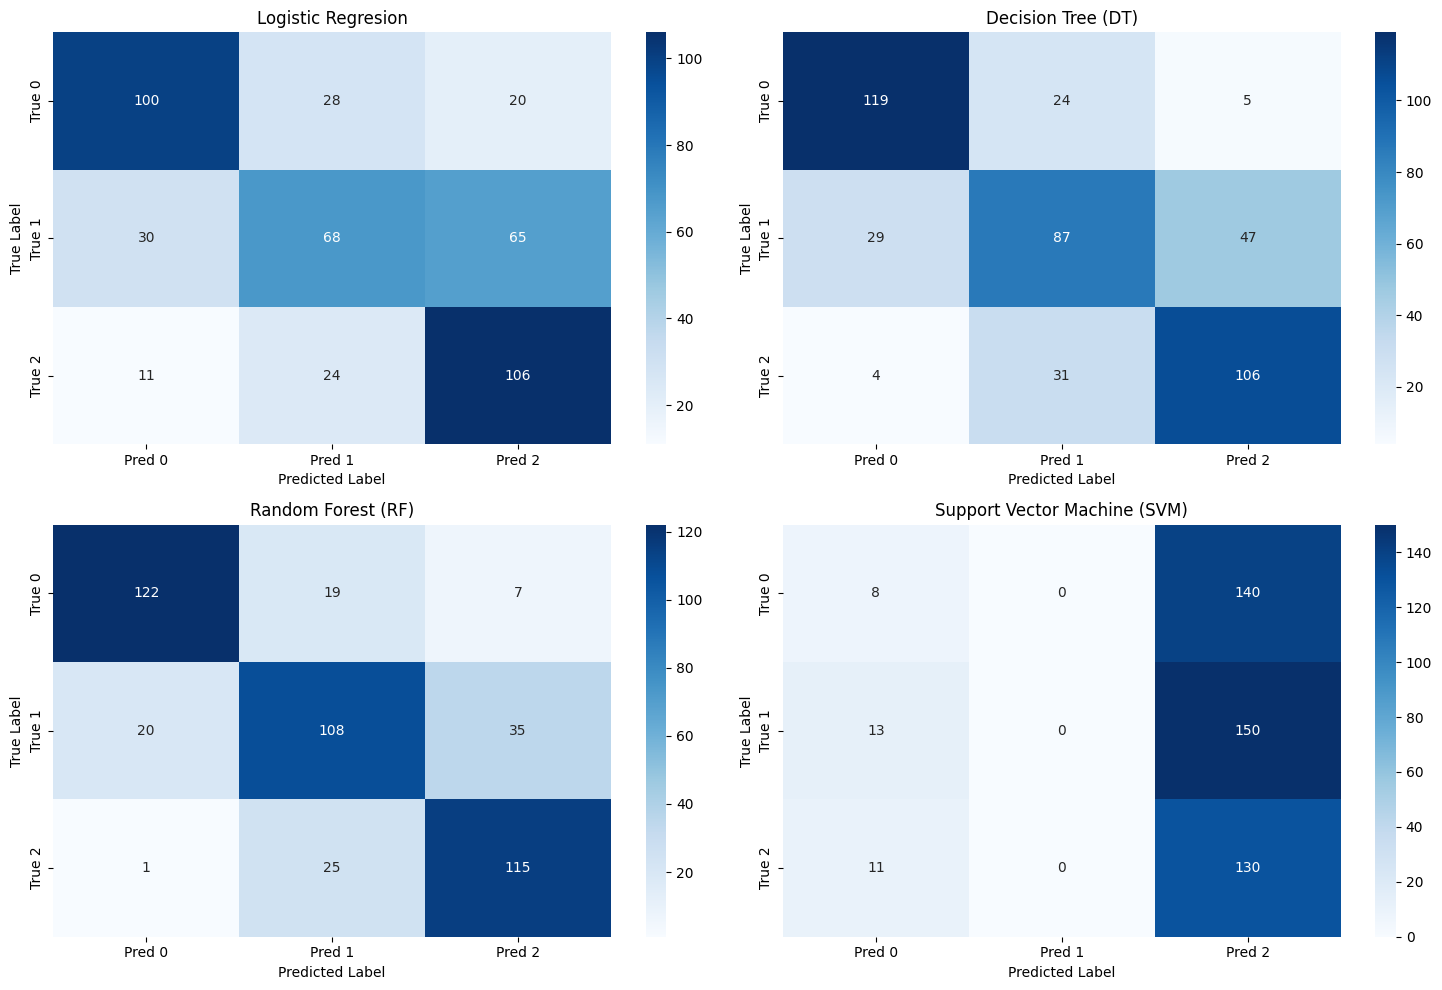

In [142]:
# Menampilkan confusion matrix untuk setiap model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Buat grid untuk menampilkan beberapa confusion matrix
axes = axes.ravel()  # Flatten agar lebih mudah diakses dengan loop

for idx, (model_name, metrics) in enumerate(results.items()):
    cm = metrics['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1', 'Pred 2'], yticklabels=['True 0', 'True 1', 'True 2'], ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
plt.show()

Dari hasil yang ada model Random forest adalah model terbaik dengan hasil accuracy tertinggi yaitu 0.76, diikuti oleh Decision Tree 0.69, Logistic Regression 0.60, dan Support Vector Machine 0.30.

Berdasarkan hal ini, kita akan menggunakan Random Forest untuk proses Deployment.

## Deployment

In [143]:
dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [144]:
pip freeze > requirements.txt